In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt


parent_directory = r'C:\Users\devot\OneDrive\Documents\CSCE 5218.001\x-ray project\COVID-19_Radiography_Dataset'
output_base_dir = "ProcessedImages"

if not os.path.exists(output_base_dir):
    os.makedirs(output_base_dir)

subdirectories = [os.path.join(parent_directory, d) for d in os.listdir(parent_directory)
                  if os.path.isdir(os.path.join(parent_directory, d))]
valid_extensions = ('.png', '.jpg', '.jpeg')
max_images_per_class = 3000

def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def equalize_histogram(image):
    return cv2.equalizeHist(image)

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(image)

def gaussian_blur(image, kernel_size=(5, 5), sigma=0):
    return cv2.GaussianBlur(image, kernel_size, sigma)

def normalize_image(image):
    return image / 255.0

total_images = 0
for directory in subdirectories:
    image_dir = os.path.join(directory, 'images')
    if not os.path.exists(image_dir):
        continue
    image_list = [f for f in os.listdir(image_dir) if f.lower().endswith(valid_extensions)]
    if len(image_list) > max_images_per_class:
        image_list = random.sample(image_list, max_images_per_class)
    total_images += len(image_list)

print(f"Total images to process: {total_images}")

processed_images = 0
for directory in subdirectories:
    category = os.path.basename(directory)
    image_dir = os.path.join(directory, 'images')
    if not os.path.exists(image_dir):
        continue
    category_output_dir = os.path.join(output_base_dir, category)
    os.makedirs(category_output_dir, exist_ok=True)
    image_list = [f for f in os.listdir(image_dir) if f.lower().endswith(valid_extensions)]
    if len(image_list) > max_images_per_class:
        image_list = random.sample(image_list, max_images_per_class)
    print(f'\nProcessing images in: {category} - {len(image_list)} images will be processed')
    for image_file in image_list:
        image_path = os.path.join(image_dir, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load image: {image_file}")
            continue
        resized = resize_image(img)
        hist_eq = equalize_histogram(resized)
        clahe_img = apply_clahe(resized)
        blur = gaussian_blur(resized)
        normalized = normalize_image(resized)
        # (Optional display code removed to speed up processing)
        save_path = os.path.join(category_output_dir, image_file)
        cv2.imwrite(save_path, clahe_img)
        processed_images += 1
        print(f'Images left to process: {total_images - processed_images}')


Total images to process: 10345

Processing images in: COVID - 3000 images will be processed
Images left to process: 10344
Images left to process: 10343
Images left to process: 10342
Images left to process: 10341
Images left to process: 10340
Images left to process: 10339
Images left to process: 10338
Images left to process: 10337
Images left to process: 10336
Images left to process: 10335
Images left to process: 10334
Images left to process: 10333
Images left to process: 10332
Images left to process: 10331
Images left to process: 10330
Images left to process: 10329
Images left to process: 10328
Images left to process: 10327
Images left to process: 10326
Images left to process: 10325
Images left to process: 10324
Images left to process: 10323
Images left to process: 10322
Images left to process: 10321
Images left to process: 10320
Images left to process: 10319
Images left to process: 10318
Images left to process: 10317
Images left to process: 10316
Images left to process: 10315
Images l

In [2]:
import os
import random
import shutil

processed_base_dir = "ProcessedImages"
split_base_dir = "ProcessedImages_Split"
splits = ["train", "val", "test"]

for split in splits:
    for category in os.listdir(processed_base_dir):
        category_path = os.path.join(processed_base_dir, category)
        if os.path.isdir(category_path):
            split_category_dir = os.path.join(split_base_dir, split, category)
            os.makedirs(split_category_dir, exist_ok=True)

for category in os.listdir(processed_base_dir):
    category_path = os.path.join(processed_base_dir, category)
    if not os.path.isdir(category_path):
        continue
    images = [f for f in os.listdir(category_path) if f.lower().endswith(valid_extensions)]
    random.shuffle(images)
    n = len(images)
    train_end = int(0.7 * n)
    val_end = train_end + int(0.15 * n)
    train_images = images[:train_end]
    val_images = images[train_end:val_end]
    test_images = images[val_end:]
    for img in train_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(split_base_dir, "train", category, img)
        shutil.copy(src, dst)
    for img in val_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(split_base_dir, "val", category, img)
        shutil.copy(src, dst)
    for img in test_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(split_base_dir, "test", category, img)
        shutil.copy(src, dst)

print("Data split into train/val/test directories successfully.")


Data split into train/val/test directories successfully.


Found 17252 images belonging to 4 classes.
Found 7274 images belonging to 4 classes.
Found 7337 images belonging to 4 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)       ┃ Output Shape     ┃   Param # ┃ Connected to     ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ input_layer        │ (None, 224, 224, │         0 │ -                │
│ (InputLayer)       │ 3)               │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv1_pad          │ (None, 230, 230, │         0 │ input_layer[0][… │
│ (ZeroPadding2D)    │ 3)               │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv1_conv         │ (None, 112, 112, │     9,472 │ conv1_pad[0][0]  │
│ (Conv2D)           │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ pool1_pad          │ (None, 114, 114, │         0 │ conv1_conv[0][0] │
│ (ZeroPadding2D)    │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ pool1_pool         │ (None, 56, 56,   │         0 │ pool1_pad[0][0]  │
│ (MaxPooling2D)     │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_prea… │ (None, 56, 56,   │       256 │ pool1_pool[0][0] │
│ (BatchNormalizati… │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_prea… │ (None, 56, 56,   │         0 │ conv2_block1_pr… │
│ (Activation)       │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_1_co… │ (None, 56, 56,   │     4,096 │ conv2_block1_pr… │
│ (Conv2D)           │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_1_bn  │ (None, 56, 56,   │       256 │ conv2_block1_1_… │
│ (BatchNormalizati… │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_1_re… │ (None, 56, 56,   │         0 │ conv2_block1_1_… │
│ (Activation)       │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_2_pad │ (None, 58, 58,   │         0 │ conv2_block1_1_… │
│ (ZeroPadding2D)    │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_2_co… │ (None, 56, 56,   │    36,864 │ conv2_block1_2_… │
│ (Conv2D)           │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_2_bn  │ (None, 56, 56,   │       256 │ conv2_block1_2_… │
│ (BatchNormalizati… │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_2_re… │ (None, 56, 56,   │         0 │ conv2_block1_2_… │
│ (Activation)       │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_0_co… │ (None, 56, 56,   │    16,640 │ conv2_block1_pr… │
│ (Conv2D)           │ 256)             │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_3_co… │ (None, 56, 56,   │    16,640 │ conv2_block1_2_… │
│ (Conv2D)           │ 256)             │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_out   │ (None, 56, 56,   │         0 │ conv2_block1_0_… │
│ (Add)              │ 256)             │           │ conv2_block1_3_… │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block2_prea… │ (None, 56, 56,   │     1,024 │ conv

 Total params: 23,572,996 (89.92 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

C:\Users\devot\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 816s 1s/step - accuracy: 0.4116 - loss: 1.5074 - val_accuracy: 0.6788 - val_loss: 0.7943 - learning_rate: 1.0000e-04
Epoch 2/10
  1/539 ━━━━━━━━━━━━━━━━━━━━ 7:04 788ms/step - accuracy: 0.6875 - loss: 0.9343

C:\Users\devot\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


539/539 ━━━━━━━━━━━━━━━━━━━━ 2903s 5s/step - accuracy: 0.6875 - loss: 0.9343 - val_accuracy: 0.6791 - val_loss: 0.7944 - learning_rate: 1.0000e-04
Epoch 3/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 654s 1s/step - accuracy: 0.6456 - loss: 0.8900 - val_accuracy: 0.7296 - val_loss: 0.6854 - learning_rate: 1.0000e-04
Epoch 4/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 165s 304ms/step - accuracy: 0.7188 - loss: 0.6996 - val_accuracy: 0.7292 - val_loss: 0.6850 - learning_rate: 1.0000e-04
Epoch 5/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - accuracy: 0.6910 - loss: 0.7703 - val_accuracy: 0.7519 - val_loss: 0.6347 - learning_rate: 1.0000e-04
Epoch 6/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 161s 297ms/step - accuracy: 0.6875 - loss: 1.1259 - val_accuracy: 0.7533 - val_loss: 0.6337 - learning_rate: 1.0000e-04
Epoch 7/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 595s 1s/step - accuracy: 0.7149 - loss: 0.7069 - val_accuracy: 0.7631 - val_loss: 0.6149 - learning_rate: 1.0000e-04
Epoch 8/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 158s 292ms/step - accu

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)       ┃ Output Shape     ┃   Param # ┃ Connected to     ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ input_layer        │ (None, 224, 224, │         0 │ -                │
│ (InputLayer)       │ 3)               │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv1_pad          │ (None, 230, 230, │         0 │ input_layer[0][… │
│ (ZeroPadding2D)    │ 3)               │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv1_conv         │ (None, 112, 112, │     9,472 │ conv1_pad[0][0]  │
│ (Conv2D)           │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ pool1_pad          │ (None, 114, 114, │         0 │ conv1_conv[0][0] │
│ (ZeroPadding2D)    │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ pool1_pool         │ (None, 56, 56,   │         0 │ pool1_pad[0][0]  │
│ (MaxPooling2D)     │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_prea… │ (None, 56, 56,   │       256 │ pool1_pool[0][0] │
│ (BatchNormalizati… │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_prea… │ (None, 56, 56,   │         0 │ conv2_block1_pr… │
│ (Activation)       │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_1_co… │ (None, 56, 56,   │     4,096 │ conv2_block1_pr… │
│ (Conv2D)           │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_1_bn  │ (None, 56, 56,   │       256 │ conv2_block1_1_… │
│ (BatchNormalizati… │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_1_re… │ (None, 56, 56,   │         0 │ conv2_block1_1_… │
│ (Activation)       │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_2_pad │ (None, 58, 58,   │         0 │ conv2_block1_1_… │
│ (ZeroPadding2D)    │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_2_co… │ (None, 56, 56,   │    36,864 │ conv2_block1_2_… │
│ (Conv2D)           │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_2_bn  │ (None, 56, 56,   │       256 │ conv2_block1_2_… │
│ (BatchNormalizati… │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_2_re… │ (None, 56, 56,   │         0 │ conv2_block1_2_… │
│ (Activation)       │ 64)              │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_0_co… │ (None, 56, 56,   │    16,640 │ conv2_block1_pr… │
│ (Conv2D)           │ 256)             │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_3_co… │ (None, 56, 56,   │    16,640 │ conv2_block1_2_… │
│ (Conv2D)           │ 256)             │           │                  │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block1_out   │ (None, 56, 56,   │         0 │ conv2_block1_0_… │
│ (Add)              │ 256)             │           │ conv2_block1_3_… │
├────────────────────┼──────────────────┼───────────┼──────────────────┤
│ conv2_block2_prea… │ (None, 56, 56,   │     1,024 │ conv

 Total params: 23,572,996 (89.92 MB)

 Trainable params: 7,887,876 (30.09 MB)

 Non-trainable params: 15,685,120 (59.83 MB)

Epoch 1/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 676s 1s/step - accuracy: 0.7202 - loss: 0.7138 - val_accuracy: 0.8084 - val_loss: 0.5138 - learning_rate: 1.0000e-05
Epoch 2/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 161s 297ms/step - accuracy: 0.7188 - loss: 0.5506 - val_accuracy: 0.8088 - val_loss: 0.5132 - learning_rate: 1.0000e-05
Epoch 3/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 654s 1s/step - accuracy: 0.7826 - loss: 0.5707 - val_accuracy: 0.8264 - val_loss: 0.4566 - learning_rate: 1.0000e-05
Epoch 4/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 156s 289ms/step - accuracy: 0.9062 - loss: 0.4614 - val_accuracy: 0.8265 - val_loss: 0.4569 - learning_rate: 1.0000e-05
Epoch 5/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 644s 1s/step - accuracy: 0.8092 - loss: 0.5037 - val_accuracy: 0.8462 - val_loss: 0.4098 - learning_rate: 1.0000e-05
Epoch 6/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 158s 292ms/step - accuracy: 0.7188 - loss: 0.6804 - val_accuracy: 0.8464 - val_loss: 0.4093 - learning_rate: 1.0000e-05
Epoch 7/15
539/539 ━━━━━━━━━━━━━━━━━━━━ 647s 1s/s

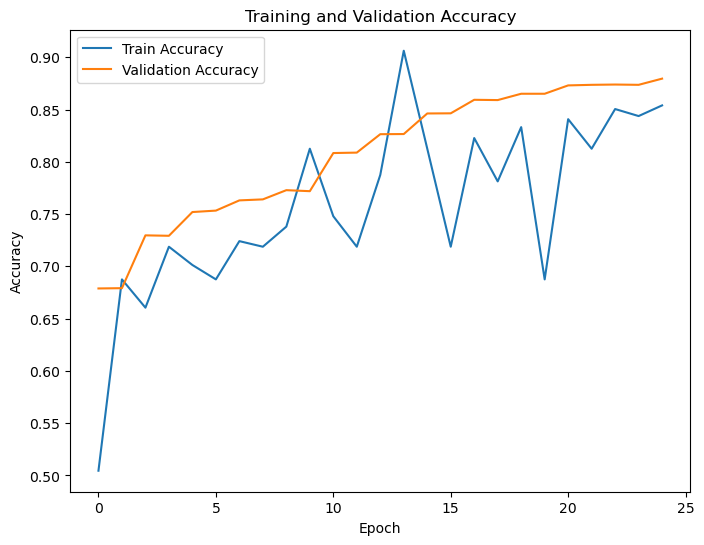

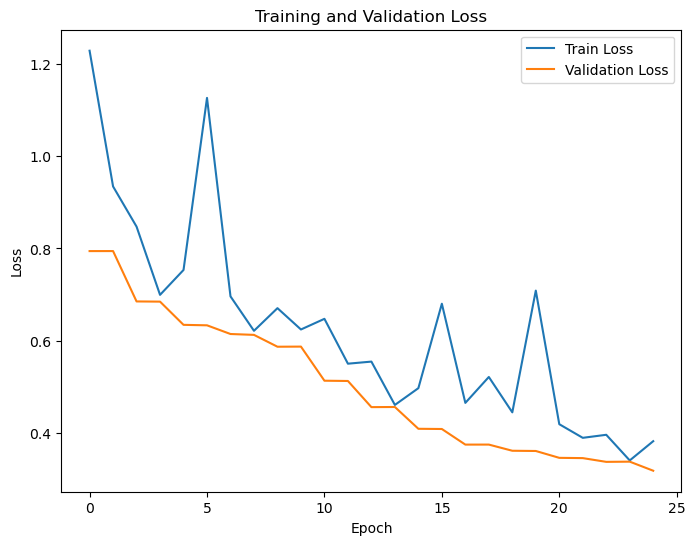

In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

split_base_dir = "ProcessedImages_Split"
train_dir = os.path.join(split_base_dir, "train")
val_dir = os.path.join(split_base_dir, "val")
test_dir = os.path.join(split_base_dir, "test")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

base_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze the base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

callbacks_phase1 = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint("best_model_phase1.keras", monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

history_phase1 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10,
    callbacks=callbacks_phase1
)

for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

callbacks_phase2 = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint("best_model_phase2.keras", monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

history_phase2 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=15,
    callbacks=callbacks_phase2
)

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

train_acc = history_phase1.history['accuracy'] + history_phase2.history['accuracy']
val_acc = history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy']
train_loss = history_phase1.history['loss'] + history_phase2.history['loss']
val_loss = history_phase1.history['val_loss'] + history_phase2.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


Found 7337 images belonging to 4 classes.
230/230 ━━━━━━━━━━━━━━━━━━━━ 178s 760ms/step


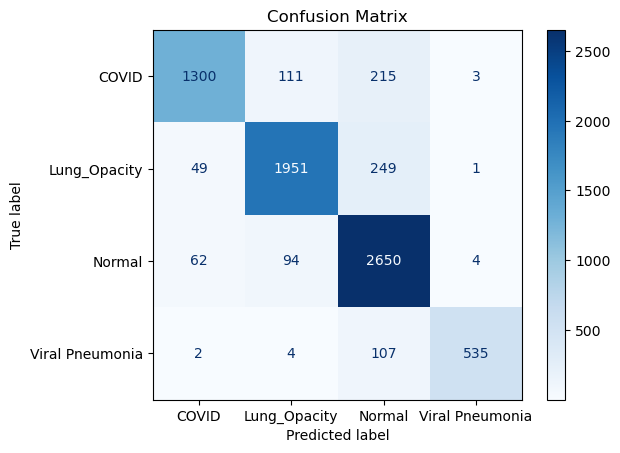

Classification Report:
                 precision    recall  f1-score   support

          COVID       0.92      0.80      0.85      1629
   Lung_Opacity       0.90      0.87      0.88      2250
         Normal       0.82      0.94      0.88      2810
Viral Pneumonia       0.99      0.83      0.90       648

       accuracy                           0.88      7337
      macro avg       0.91      0.86      0.88      7337
   weighted avg       0.88      0.88      0.88      7337



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)


y_true = test_generator.classes


y_pred_probs = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)


y_pred = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_true, y_pred)


class_labels = list(test_generator.class_indices.keys())


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

baseline_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

baseline_model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=5
)

baseline_test_loss, baseline_test_accuracy = baseline_model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print(f"Baseline Test Loss: {baseline_test_loss:.4f}")
print(f"Baseline Test Accuracy: {baseline_test_accuracy:.4f}")


Epoch 1/5
539/539 ━━━━━━━━━━━━━━━━━━━━ 401s 741ms/step - accuracy: 0.5061 - loss: 1.5629 - val_accuracy: 0.6061 - val_loss: 0.9051
Epoch 2/5
  1/539 ━━━━━━━━━━━━━━━━━━━━ 2:56 327ms/step - accuracy: 0.6875 - loss: 1.0582

C:\Users\devot\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


539/539 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.6875 - loss: 1.0582 - val_accuracy: 0.6136 - val_loss: 0.8863
Epoch 3/5
539/539 ━━━━━━━━━━━━━━━━━━━━ 388s 720ms/step - accuracy: 0.6182 - loss: 0.9000 - val_accuracy: 0.6580 - val_loss: 0.8242
Epoch 4/5
539/539 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.6250 - loss: 0.8548 - val_accuracy: 0.6611 - val_loss: 0.8215
Epoch 5/5
539/539 ━━━━━━━━━━━━━━━━━━━━ 392s 727ms/step - accuracy: 0.6667 - loss: 0.8086 - val_accuracy: 0.6879 - val_loss: 0.7597
229/229 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - accuracy: 0.5155 - loss: 1.0660
Baseline Test Loss: 0.7547
Baseline Test Accuracy: 0.6935
